<a href="https://colab.research.google.com/github/Suchit153/Guvi/blob/master/Guvi03_FeedForwardNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Outlook
1. Generate Data that is not linearly separable.
2. Train with Sigmoid and see performance.
3. Write from scratch our first Feed Forward Network.
4. Train the FF network on the data and compare with Sigmoid.
5. Write a generic class for FF Network
6. Train generic class on binary classification
7. Generate data for multi-class classification
8. Train FF network for '7'
9. Use softmax as output layer and cross-entropy loss function
10. Train with '8' for multi-class classification


#Setup

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.colors
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
#import tqdm
from tqdm import tqdm_notebook
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

In [ ]:
class SigmoidNeuron:

  def __init__(self):
    self.w = None
    self.b = None

  def perceptron(self, x):
    return np.dot(x, self.w.T) + self.b

  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))

  def grad_w_mse(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x

  def grad_b_mse(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)

  def grad_w_ce(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    if y==0:
      return y_pred*x
    elif y==1:
      return -1*(1-y_pred)*x
    else:
      raise ValueError("y should be 0 or 1")

  def grad_b_ce(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    if y==0:
      return y_pred
    elif y==1:
      return -1*(1-y_pred)
    else:
      raise ValueError("y should be 0 or 1")

  def fit(self, X, Y, epochs=1, learning_rate=1, initialize=True, loss_fn="mse", display_loss=False):

    #initialize W and B
    if initialize:
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0

    if display_loss:
      loss = []

     #tqdm_notebook gives a progress bar to show how much of the for loop has completed)

    for i in tqdm_notebook(range(epochs), total=epochs, unit='epoch'):
      dw = 0
      db = 0
      for x,y in zip(X,Y):
        if loss_fn=="mse":
          dw += self.grad_w_mse(x,y)
          db += self.grad_b_mse(x,y)
        elif loss_fn=="ce":
          dw += self.grad_w_ce(x,y)
          db += self.grad_b_ce(x,y)

      #'m' is used to control learning rate depending on number of inputs. many datapoints -> large 'm' and hence lower learing rate; and vice versa
      m = X.shape[1]
      self.w -= learning_rate * dw/m
      self.b -= learning_rate * db/m

      if display_loss:
        Y_pred = self.sigmoid(self.perceptron(X))
        if loss_fn=="mse":
          loss.append(mean_squared_error(Y_pred,Y))
        if loss_fn=="ce":
          loss.append(log_loss(Y_pred,Y))

    if display_loss:
      plt.plot(loss)
      plt.xlabel('Epochs')
      if loss_fn=="mse":
        plt.ylabel('Mean Squarred Error')
      if loss_fn=="ce":
        plt.ylabel('Log Loss')
      plt.show()

  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred)

In [ ]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["red","yellow","green"])

#Generate Data

In [ ]:
 #make_blobs -> generates non-linearly separable data
 #centers -> no. of clusters/blobs in the data generated (y)
 #n_features -> no. of input features (x) THherefore n_features=2 => x1 and x2
data, labels = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=0)
print(data.shape,labels.shape)

(1000, 2) (1000,)


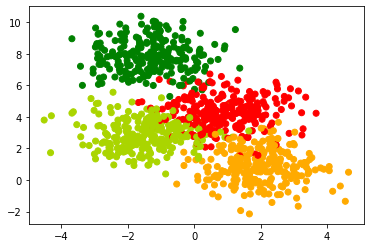

In [ ]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)   #c -> group colors according to labels

In [ ]:
#grouping clusters such that we get 2 classes
labels_orig = labels
labels = np.mod(labels_orig, 2)

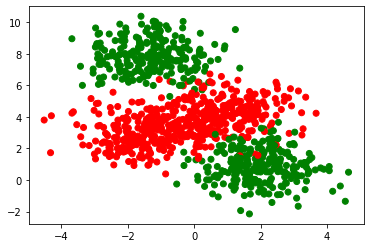

In [ ]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify=labels, random_state=0)
print(X_train.shape, X_val.shape)

(750, 2) (250, 2)


#Sigmoid Neuron Classification

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/1000 [00:00<?, ?epoch/s]

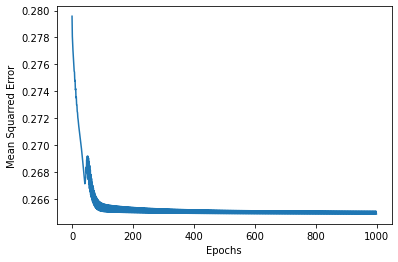

In [ ]:
sn = SigmoidNeuron()
sn.fit(X_train, Y_train, epochs=1000, learning_rate=0.5, display_loss=True)

In [ ]:
Y_pred_train = sn.predict(X_train)
Y_pred_binarised_train = (Y_pred_train>=0.5).astype("int").ravel()
Y_pred_val = sn.predict(X_val)
Y_pred_binarised_val = (Y_pred_val>=0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train,Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_val,Y_val)

print("Training Accuracy = ", round(accuracy_train,2))
print("Validatoion Accuracy = ", round(accuracy_val,2))

Training Accuracy =  0.73
Validatoion Accuracy =  0.72


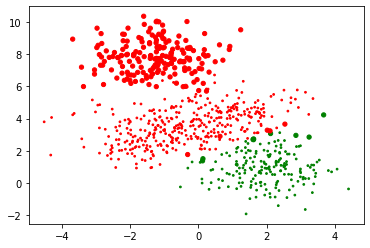

In [ ]:
# s -> size of each point in scatter plot; Hence if point is small then the model predicted correct output and if big then wrong prediction
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binarised_train, cmap=my_cmap, s=15*(np.abs(Y_pred_binarised_train-Y_train)+.2))

#First FF Network

In [ ]:
#For this DNN model -> 2 inputs (x1,x2) ; 1 output (y) ; 1st hidden layer with 2 sigmoids (a1,h1 , a2,h2) and 2nd hidden layer with 1 sigmoid (a3,h3)

class FirstFFNetwork:

  def __init__(self):

    #input x1 to sigmoid (a1,h1)
    self.w1 = np.random.randn()
    #input x2 to sigmoid (a1,h1)
    self.w2 = np.random.randn()
    #input x1 to sigmoid (a2,h2)
    self.w3 = np.random.randn()
    #input x2 to sigmoid (a2,h2)
    self.w4 = np.random.randn()
    #sigmoid (a1,h1) to sigmoid (a3,h3)
    self.w5 = np.random.randn()
    #sigmoid (a2,h2) to sigmoid (a3,h3)
    self.w6 = np.random.randn()
    #bias for sigmoid (a1,h1)
    self.b1 = 0
    #bias for sigmoid (a2,h2)
    self.b2 = 0
    #bias for sigmoid (a3,h3)
    self.b3 = 0

  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))

  def forward_pass(self, x):
    self.x1 , self.x2 = x

    #pre processing for sigmoid (a1,h1)
    self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
    #processing for sigmoid (a1,h1)
    self.h1 = self.sigmoid(self.a1)
    #pre processing for sigmoid (a2,h2)
    self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
    #processing for sigmoid (a2,h2)
    self.h2 = self.sigmoid(self.a2)
    #pre processing for sigmoid (a3,h3)
    self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3
    #processing for sigmoid (a3,h3)
    self.h3 = self.sigmoid(self.a3)
    #For binary classification y_pred = h3
    return self.h3

  def grad(self, x, y):
    self.forward_pass(x)

    #Update weights and biases for sigmoid (a3,h3)
    self.dw5 = (self.h3-y) * self.h3*(1-self.h3) * self.h1
    self.dw6 = (self.h3-y) * self.h3*(1-self.h3) * self.h2
    self.db3 = (self.h3-y) * self.h3*(1-self.h3)

    #Update weights and biases for sigmoid (a1,h1)
    self.dw1 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x1
    self.dw2 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x2
    self.db1 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1)

    #Update weights and biases for sigmoid (a2,h2)
    self.dw3 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2) * self.x1
    self.dw4 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2) * self.x2
    self.db2 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2)

  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, display_loss=False):

    #initialise w,b
    self.w1 = np.random.randn()
    self.w2 = np.random.randn()
    self.w3 = np.random.randn()
    self.w4 = np.random.randn()
    self.w5 = np.random.randn()
    self.w6 = np.random.randn()
    self.b1 = 0
    self.b2 = 0
    self.b3 = 0

    if display_loss:
      loss = []

    for i in tqdm_notebook(range(epochs), total=epochs, unit='epoch'):
      dw1, dw2, dw3, dw4, dw5, dw6, db1, db2, db3 = [0]*9

      for x,y in zip(X,Y):
        self.grad(x,y)
        dw1 += self.dw1
        dw2 += self.dw2
        dw3 += self.dw3
        dw4 += self.dw4
        dw5 += self.dw5
        dw6 += self.dw6
        db1 += self.db1
        db2 += self.db2
        db3 += self.db3

      m = X.shape[1]
      self.w1 -= learning_rate * dw1 / m
      self.w2 -= learning_rate * dw2 / m
      self.w3 -= learning_rate * dw3 / m
      self.w4 -= learning_rate * dw4 / m
      self.w5 -= learning_rate * dw5 / m
      self.w6 -= learning_rate * dw6 / m
      self.b1 -= learning_rate * db1 / m
      self.b2 -= learning_rate * db2 / m
      self.b3 -= learning_rate * db3 / m

      if display_loss:
        Y_pred = self.predict(X)
        loss.append(mean_squared_error(Y_pred,Y))

    if display_loss:
      plt.plot(loss)
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()

  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred)

#FF Network Classification

In [ ]:
ffn = FirstFFNetwork()
ffn.fit(X_train, Y_train, epochs=2000, learning_rate=0.01, display_loss=True)

In [ ]:
Y_pred_train = ffn.predict(X_train)
Y_pred_binarised_train = (Y_pred_train>=0.5).astype("int").ravel()
Y_pred_val = ffn.predict(X_val)
Y_pred_binarised_val = (Y_pred_val>=0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train,Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_val,Y_val)

print("Training Accuracy = ", round(accuracy_train,2))
print("Validatoion Accuracy = ", round(accuracy_val,2))

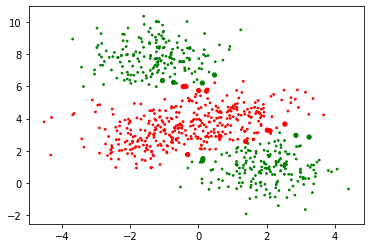

In [ ]:
# s -> size of each point in scatter plot; Hence if point is small then the model predicted correct output and if big then wrong prediction
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binarised_train, cmap=my_cmap, s=15*(np.abs(Y_pred_binarised_train-Y_train)+.2))

#Generating other types of non-linearly separable data

In [ ]:
from sklearn.datasets import make_moons, make_circles

In [ ]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["red","yellow","green"])

In [ ]:
data, labels = make_moons(n_samples=1000, random_state=0, noise=0.21)   #noise parameter controls inter-mingling of positive and negetive data
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)

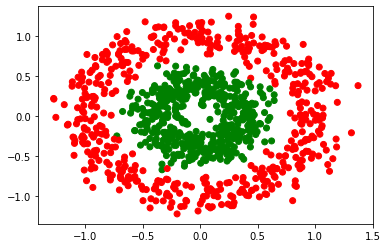

In [ ]:
data, labels = make_circles(n_samples=1000, random_state=0, noise=0.12, factor=0.4)   #factor parameter controls radii ratio between both circles
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)